## Observations and Insights 

In [2]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
pymaceuticals_df = mouse_metadata.merge(study_results,on=['Mouse ID'],how = 'left')

# Display the data table for preview
pymaceuticals_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#mouse_metadata

In [4]:
#study_results

In [5]:
# Checking the number of mice.
num_of_mice = pymaceuticals_df['Mouse ID'].count()
num_of_mice

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups =pymaceuticals_df [pymaceuticals_df.duplicated(subset =['Mouse ID','Timepoint'])]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
print("All the data for the duplicate mouse ID:")
dups

All the data for the duplicate mouse ID:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_df = pymaceuticals_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep = 'last')
drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_num = drop_df['Mouse ID'].count()
mice_num

1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_groupby =drop_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumorvol = regimen_groupby['Tumor Volume (mm3)'].mean()
median_tumorvol = regimen_groupby['Tumor Volume (mm3)'].median()
var_tumorval = regimen_groupby['Tumor Volume (mm3)'].var()
std_tumorvol= regimen_groupby['Tumor Volume (mm3)'].std()
sem_tumorvol = regimen_groupby['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean of Tumor Volume':mean_tumorvol,'Median of Tumor Volume':median_tumorvol,
                           'Variance of Tumor Volume':var_tumorval,'Standard Deviation for Tumor Volume':std_tumorvol,
                           'SEM for Tumor Volume':sem_tumorvol})
summary_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation for Tumor Volume,SEM for Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df =drop_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


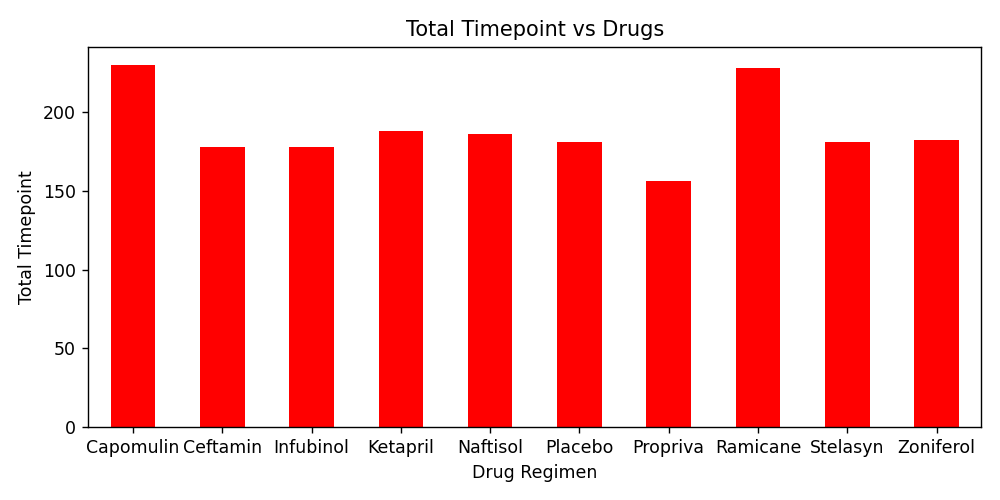

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_mice = regimen_groupby['Mouse ID'].count()
plot_mice.plot(kind ='bar',rot =0,figsize =(8,4),color ='Red')
plt.ylabel("Total Timepoint")
plt.xlabel("Drug Regimen")
plt.title("Total Timepoint vs Drugs")
plt.tight_layout()

<IPython.core.display.Javascript object>


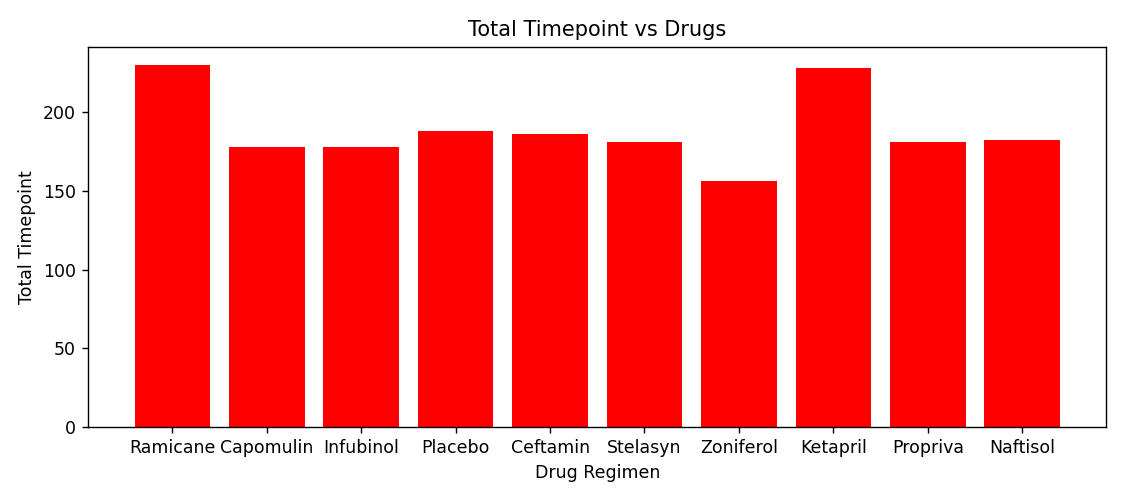

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(9,4))
y_axis = plot_mice
x_axis = drop_df['Drug Regimen'].unique()
plt.bar(x_axis,y_axis,color='Red')
plt.ylabel("Total Timepoint")
plt.xlabel("Drug Regimen")
plt.title("Total Timepoint vs Drugs")
plt.tight_layout()

<IPython.core.display.Javascript object>


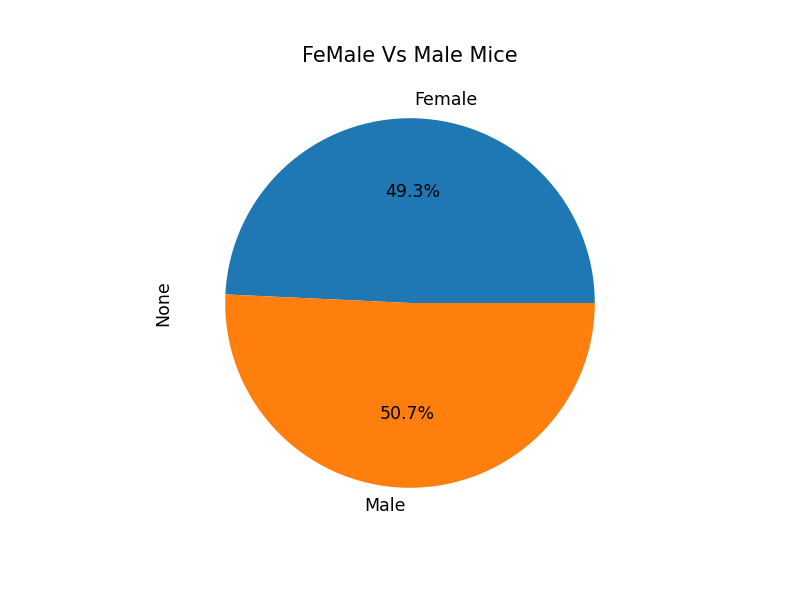

Text(0.5, 1.0, 'FeMale Vs Male Mice')

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_groupby = drop_df.groupby('Sex').size()
sex_groupby.plot(kind='pie',autopct="%1.1f%%")
plt.title('FeMale Vs Male Mice')

<IPython.core.display.Javascript object>


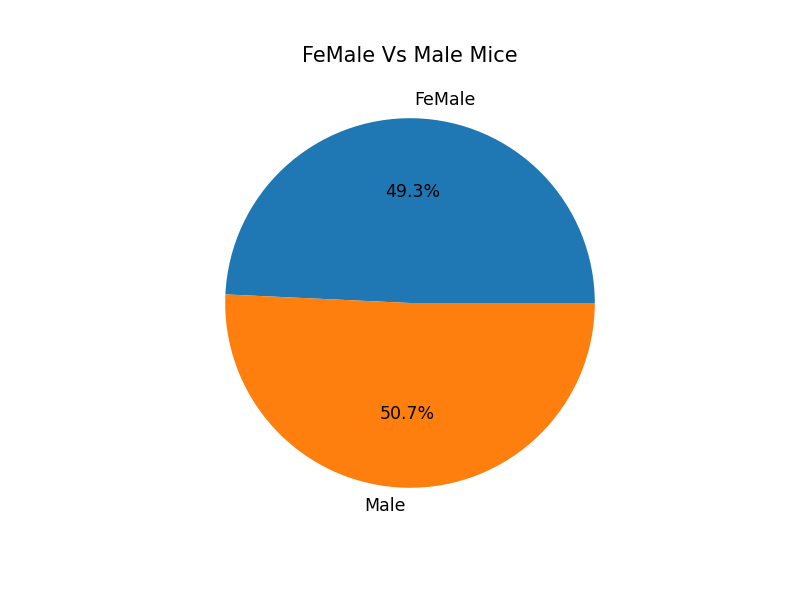

Text(0.5, 1.0, 'FeMale Vs Male Mice')

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
axis = drop_df.groupby('Sex').size()
labels = ["FeMale","Male"]
plt.pie(axis,labels=labels,autopct="%1.1f%%")
plt.title('FeMale Vs Male Mice')

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_tp_df =  drop_df.drop_duplicates(subset=['Mouse ID'],keep = 'last')
final_tp_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
for drug in drugs_list:
    loop_df= final_tp_df.loc[final_tp_df['Drug Regimen'] == drug]
    loop_tumor = loop_df['Tumor Volume (mm3)']
    tumor_vol.append(loop_tumor)
#find IQR for Capomulin  
cap_q = tumor_vol[0].quantile([.25,.5,.75])
lowerq_c = cap_q[0.25]
upperq_c = cap_q[0.75]
iqr_c = upperq_c-lowerq_c 
#find IQR for Ramicane
ram_q = tumor_vol[1].quantile([.25,.5,.75])
lowerq_r = ram_q[0.25]
upperq_r = ram_q[0.75]
iqr_r = upperq_r-lowerq_r 
#find IQR for Infubinol
inf_q = tumor_vol[2].quantile([.25,.5,.75])
lowerq_i = inf_q[0.25]
upperq_i = inf_q[0.75]
iqr_i = upperq_i-lowerq_i 
#find IQR for Ceftamin
cef_q = tumor_vol[3].quantile([.25,.5,.75])
lowerq_cef = cef_q[0.25]
upperq_cef = cef_q[0.75]
iqr_cef = upperq_cef-lowerq_cef 


In [20]:
# Upper and lower bounds
print("For Capomulin")
lowerb_c=lowerq_c-(1.5*iqr_c)
upperb_c=upperq_c+(1.5*iqr_c)
print(f'value below {lowerb_c} coule be outliers.')
print(f'value above {upperb_c} could be outliers.')

print("For Ramicane")
lowerb_r=lowerq_r-(1.5*iqr_r)
upperb_r=upperq_r+(1.5*iqr_r)
print(f'value below {lowerb_r} coule be outliers.')
print(f'value above {upperb_r} could be outliers.')

print("For Infubinol")
lowerb_i=lowerq_i-(1.5*iqr_i)
upperb_i=upperq_i+(1.5*iqr_i)
print(f'value below {lowerb_i} coule be outliers.')
print(f'value above {upperb_i} could be outliers.')

print("For Ceftamin")
lowerb_cef=lowerq_cef-(1.5*iqr_cef)
upperb_cef=upperq_cef+(1.5*iqr_cef)
print(f'value below {lowerb_cef} coule be outliers.')
print(f'value above {upperb_cef} could be outliers.')



For Capomulin
value below 20.70456164999999 coule be outliers.
value above 51.83201549 could be outliers.
For Ramicane
value below 17.912664470000003 coule be outliers.
value above 54.30681135 could be outliers.
For Infubinol
value below 36.83290494999999 coule be outliers.
value above 82.74144559000001 could be outliers.
For Ceftamin
value below 25.355449580000002 coule be outliers.
value above 87.66645829999999 could be outliers.


In [21]:
#Outliers for each drugs
cap_df= final_tp_df.loc[drop_df['Drug Regimen']=='Capomulin']
outlier_occup_cap = cap_df.loc[(cap_df['Tumor Volume (mm3)'] < lowerb_c) | (cap_df['Tumor Volume (mm3)'] > upperb_c)]
if outlier_occup_cap['Tumor Volume (mm3)'].count() ==0:
    print('No outliers found for Capomulin')
else:
    print('outlier found')

ram_df= final_tp_df.loc[drop_df['Drug Regimen']=='Ramicane']
outlier_occup_ram = ram_df.loc[(ram_df['Tumor Volume (mm3)'] < lowerb_r) | (ram_df['Tumor Volume (mm3)'] > upperb_r)]
if outlier_occup_ram['Tumor Volume (mm3)'].count() == 0:
    print('No outliers found for Ramicane ')
else:
    print('outlier found')    

inf_df= final_tp_df.loc[drop_df['Drug Regimen']=='Infubinol']
outlier_occup_inf = inf_df.loc[(inf_df['Tumor Volume (mm3)'] < lowerb_i) | (inf_df['Tumor Volume (mm3)'] > upperb_i)]
if outlier_occup_inf['Tumor Volume (mm3)'].count()==0:
    print('No outliers found for Infubinol')
else:
    print('outlier found')
  
cef_df= final_tp_df.loc[drop_df['Drug Regimen']=='Ceftamin']
outlier_occup_cef = cef_df.loc[(cef_df['Tumor Volume (mm3)'] < lowerb_cef) | (cef_df['Tumor Volume (mm3)'] > upperb_cef)]
if outlier_occup_cef['Tumor Volume (mm3)'].count() ==0:
    print('No outliers found for Ceftamin ')
else:
    print('outlier found')    

No outliers found for Capomulin
No outliers found for Ramicane 
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  
No outliers found for Ceftamin 


In [49]:
#print the outliers
outlier_occup_inf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


<IPython.core.display.Javascript object>


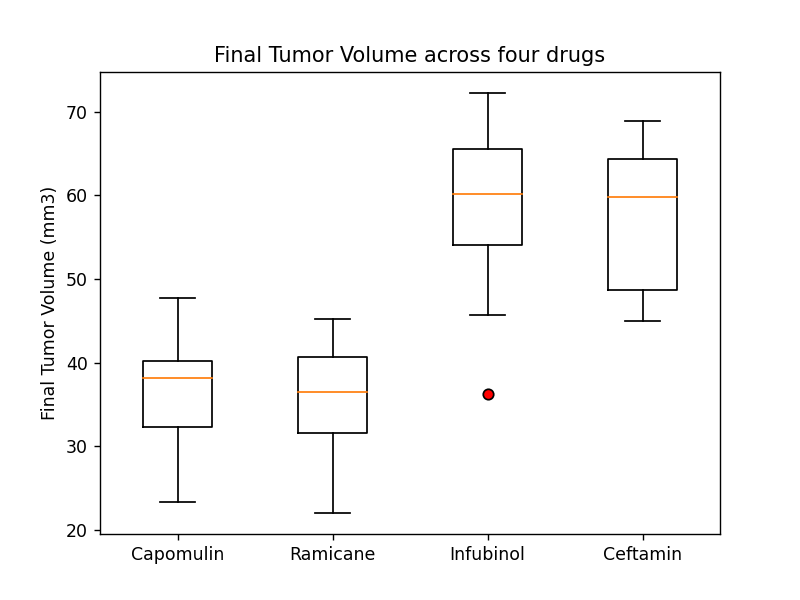

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_dot = dict(markerfacecolor='Red', marker='o')
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol,flierprops=red_dot)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title("Final Tumor Volume across four drugs")
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


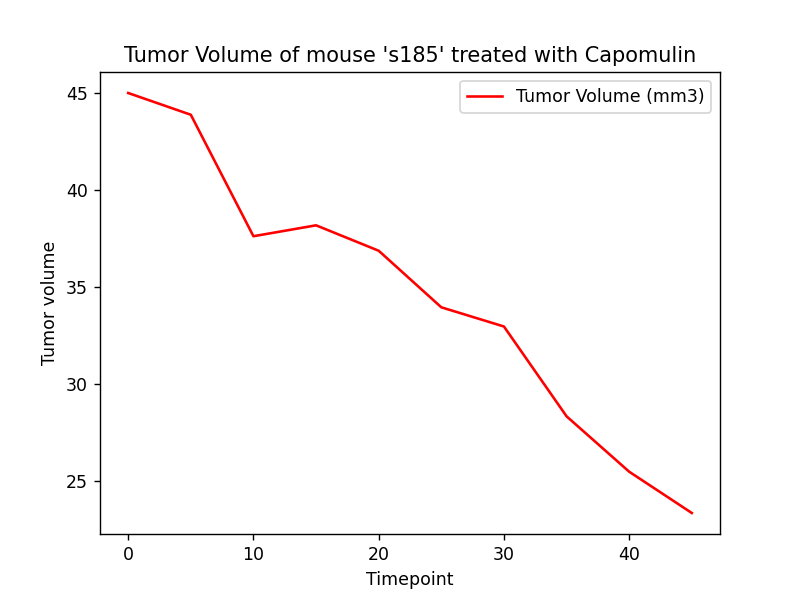

Text(0.5, 1.0, "Tumor Volume of mouse 's185' treated with Capomulin")

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = drop_df.loc[(drop_df['Mouse ID']=='s185')]
mouse_df = capomulin_df.loc[(capomulin_df['Mouse ID']=='s185')]
mouse_df.plot('Timepoint','Tumor Volume (mm3)',color= 'Red')
plt.ylabel("Tumor volume")
plt.title("Tumor Volume of mouse 's185' treated with Capomulin")

<IPython.core.display.Javascript object>


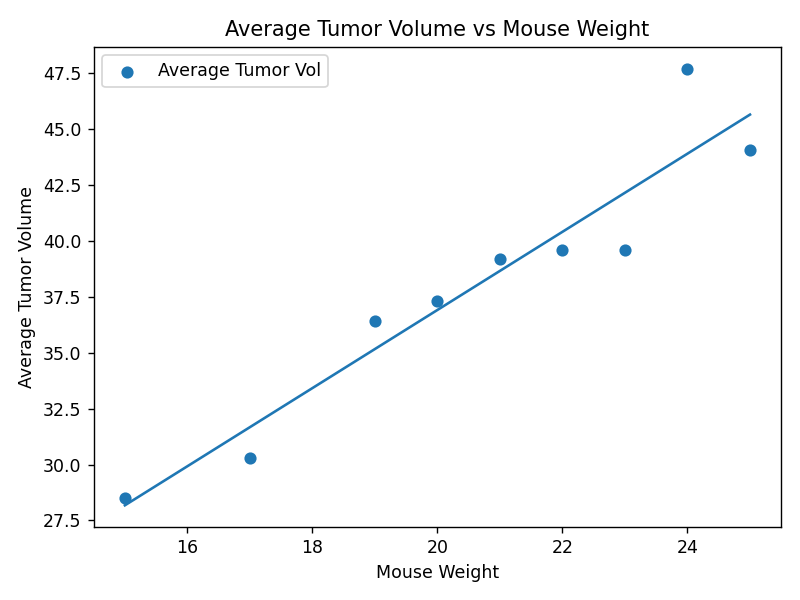

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_grpby = cap_df.groupby('Weight (g)')
avg_tumor = pd.DataFrame(cap_grpby['Tumor Volume (mm3)'].mean())
avg_tumor = avg_tumor.reset_index()
x_axis = avg_tumor['Weight (g)']
y_axis = avg_tumor['Tumor Volume (mm3)']
#scatter plot
plt.scatter(x_axis,y_axis)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.legend(["Average Tumor Vol"],loc ="upper left")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.tight_layout()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr, _ = stats.pearsonr(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"])
print(f"The correlation coefficient between weight and average tumor volume is {round(corr, 2)}")

The correlation coefficient between weight and average tumor volume is 0.95


In [24]:
#linear regresssion
avg_tumor_slope, avg_tumor_int, avg_tumor_r, avg_tumor_p, avg_tumor_std_err = stats.linregress(x_axis,y_axis)
avg_tumor_fit = avg_tumor_slope*x_axis+ avg_tumor_int
plt.plot(x_axis,avg_tumor_fit)